In [1]:
%load_ext autoreload
%autoreload 1
%aimport redditClient

In [2]:
import networkx as nx

from redditClient import redditClient

import matplotlib.pyplot as plt

In [6]:
sFileName = "programming_reply.graphml"

In [4]:
# construct Reddit client
client = redditClient()

# construct directed graph
replyGraph = nx.DiGraph()

# this dictionary used to track the ids of submissions and posts, in order for us to construct
# the links in the graph
dSubCommentId = dict()

# specify which subreddit we are interested in - 'python'
subreddit = client.subreddit('programming')


In [7]:
# loop through the hot submissions
for submission in subreddit.hot(limit=20):

    # check if author name is in the reply graph - if so, we update the number of submissions
    # associated with this user
    # if not, we construct a new node with 1 associated submission
    if submission.author.name in replyGraph:
        replyGraph.nodes[submission.author.name]['subNum'] += 1
    else:
        replyGraph.add_node(submission.author.name, subNum=1)

    submissionId = submission.name;
    # this stores the submissionId (in submission.name) and associate it to the author
    # (submission.author.name).
    dSubCommentId[submissionId] = {submissionId : submission.author.name}

    # for the current submission, retrieve the associated comments
    submission.comments.replace_more(limit=None)
    for comment in submission.comments.list():

        # some data checking to cater for deleted comments
        # we only add a link if the comment hasn't been deleted
        if comment.author is not None and comment.author.name != 'ExternalUserError':
            dSubCommentId[submissionId].update({comment.name : comment.author.name})

            # check if we have seen the comment's parent yet.  If not, then parent comment has been
            # deleted
            if comment.parent_id in dSubCommentId[submissionId]:
                # if edge exists, increment the replyNum, otherwise add a new edge
                if replyGraph.has_edge(comment.author.name, dSubCommentId[submissionId][comment.parent_id]):
                    replyGraph[comment.author.name][dSubCommentId[submissionId][comment.parent_id]]['replyNum'] += 1
                else:
                    # need to check if the nodes have been added yet, if not add it and set subNum to 0
                    if not comment.author.name in replyGraph:
                        replyGraph.add_node(comment.author.name, subNum=0)

                    if not dSubCommentId[submissionId][comment.parent_id] in replyGraph:
                        replyGraph.add_node(dSubCommentId[submissionId][comment.parent_id], subNum=0)

                    replyGraph.add_edge(comment.author.name, dSubCommentId[submissionId][comment.parent_id], replyNum=1)

                    
print(replyGraph.nodes)
#
# TODO: save graph to file
#
nx.readwrite.write_graphml(replyGraph, sFileName)


['ketralnis', 'fxfighter', 'jevring', 'DrunkensteinsMonster', 'qmunke', 'Worth_Trust_3825', 'Parachuteee', 'elons_cybertruck', 'hector_villalobos', 'scorecerer', 'wrosecrans', 'rydan', 'EpicDaNoob', 'hyperbrainer', 'franzwong', 'SirLich', 'Nowaker', 'Caraes_Naur', 'Richandler', 'BoppreH', 'english_fool', 'happy_hawking', 'WeeSingInSillyville', 'case-o-nuts', 'subfootlover', 'POWER_SNUGGLE', 'Determinant', 'Tarquin_McBeard', 'Fiennes', 'Yeitgeist', '-grok', 'myringotomy', 'ConcurrentSquared', 'MSpekkio', 'Messy-Recipe', 'Smooth-Zucchini4923', 'Berkyjay', 'yozhiki-pyzhiki', 'ThatCrankyGuy', 'Jean_Kul', 'phillipcarter2', 'animastralis', 'not_a_novel_account', 'zerothehero0', 'maestro2005', 'watabby', 'tophatstuff', 'f10101', 'pat_trick', 'Owatch', 'KawaiiNeko-', 'solve-for-x', 'RockstarArtisan', 'revereddesecration', 'Yamoyek', 'df1dcdb83cd14e6a9f7f', 'numeric-rectal-mutt', 'altik_0', 'TheNamelessKing', 'silveryRain', 'secret_online', 'untetheredocelot', 'jixsonz', 'purefabulousity', 'wat

In [8]:
# read it back in to demonstrate it works
replyGraph = nx.readwrite.read_graphml(sFileName)


# computing the degree centrality and plotting it
lDegCentrality = nx.degree_centrality(replyGraph)


#
# TODO: write code to compute eigenvetor and katz centrality
# lEigenVectorCentrality = ...
#
lEigenVectorCentrality = nx.eigenvector_centrality(replyGraph)
lKatzCentrality = nx.katz_centrality(replyGraph)


The following code displayes the histograms of the degree, eigenvector and katz centrality values of the graph.

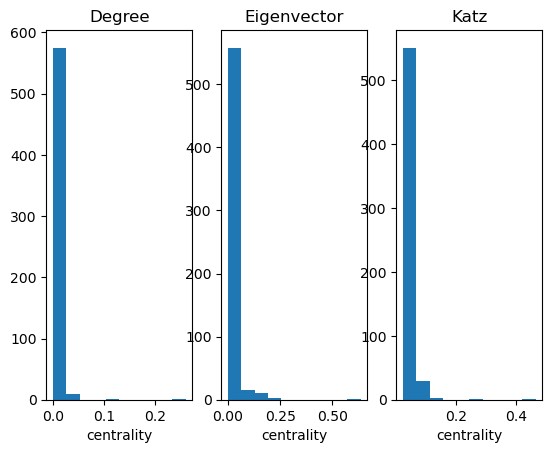

In [9]:
# plot histograms
plt.subplot(1,3,1)
plt.hist(list(lDegCentrality.values()))
plt.title('Degree')
plt.xlabel('centrality')
#
# TODO: plot the other two histograms
#
# eigenvector centrality
plt.subplot(1, 3, 2)
plt.hist(list(lEigenVectorCentrality.values()))
plt.title('Eigenvector')
plt.xlabel('centrality')
# katz centrality
plt.subplot(1, 3, 3)
plt.hist(list(lKatzCentrality.values()))
plt.title('Katz')
plt.xlabel('centrality')

plt.show()

The following code computes the SNA statistics/measures to do with centrality, clustering coefficient, connected components and bridges.

In [11]:
#
# TODO: update the node attributes with centrality
#
# eigenvector centrality, stored in node attribute 'eigen'
for nodeId, cent in lEigenVectorCentrality.items():
    replyGraph.nodes[nodeId]['eigen'] = float(cent)

# katz centrality, stored in node attribute 'katz'
for nodeId, cent in lKatzCentrality.items():
    replyGraph.nodes[nodeId]['katz'] = float(cent)


#
# TODO: write out graph to new file
#
nx.readwrite.write_graphml(replyGraph, 'mod' + sFileName, infer_numeric_types=True)


#
# TODO: compute the other SNA measures specified in the lab
#

#
# compute clustering
# the networkx code is within format(...)
#
print('Gloabl clustering coefficient/transitivit = {}'.format(nx.transitivity(replyGraph)))


#
# compute components
#
print('number of strongly connected components = {}'.format(nx.number_strongly_connected_components(replyGraph)))
print('number of weakly connected components = {}'.format(nx.number_weakly_connected_components(replyGraph)))



#
# compute bridges
#
print(list(nx.bridges(replyGraph.to_undirected())))


Gloabl clustering coefficient/transitivit = 0.06005338078291815
number of strongly connected components = 373
number of weakly connected components = 15
[('ketralnis', 'jevring'), ('ketralnis', 'Worth_Trust_3825'), ('ketralnis', 'hyperbrainer'), ('ketralnis', 'Richandler'), ('ketralnis', 'Tarquin_McBeard'), ('ketralnis', 'Fiennes'), ('ketralnis', 'Yeitgeist'), ('ketralnis', 'Messy-Recipe'), ('ketralnis', 'altik_0'), ('ketralnis', 'jixsonz'), ('ketralnis', 'Cautious-Nothing-471'), ('ketralnis', 'rhaksw'), ('ketralnis', 'qmunke'), ('ketralnis', 'Parachuteee'), ('ketralnis', 'hector_villalobos'), ('ketralnis', 'scorecerer'), ('ketralnis', 'EpicDaNoob'), ('ketralnis', 'franzwong'), ('ketralnis', 'SirLich'), ('ketralnis', 'Nowaker'), ('ketralnis', 'BoppreH'), ('ketralnis', 'english_fool'), ('ketralnis', 'happy_hawking'), ('ketralnis', 'WeeSingInSillyville'), ('ketralnis', 'POWER_SNUGGLE'), ('ketralnis', 'myringotomy'), ('ketralnis', 'ConcurrentSquared'), ('ketralnis', 'MSpekkio'), ('ketraln

In [12]:
import networkx as nx
# python-louvain
import community
import random
import csv

import matplotlib.pyplot as plt

In [ ]:
# filename of graph to read in
sFilename = "workshop9.graphml"

# filename of ground truth labels
sGroundTruthFilename = "workshop9GroundTruth.csv"